# Homework 3 - Ames Housing Dataset

**Name:** Ruchit Modi  
**SBU ID:** 112685342

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [2]:
# Load training data
df = dt.fread('dataset/train.csv').to_pandas()

## Part 1 - Pairwise Correlations

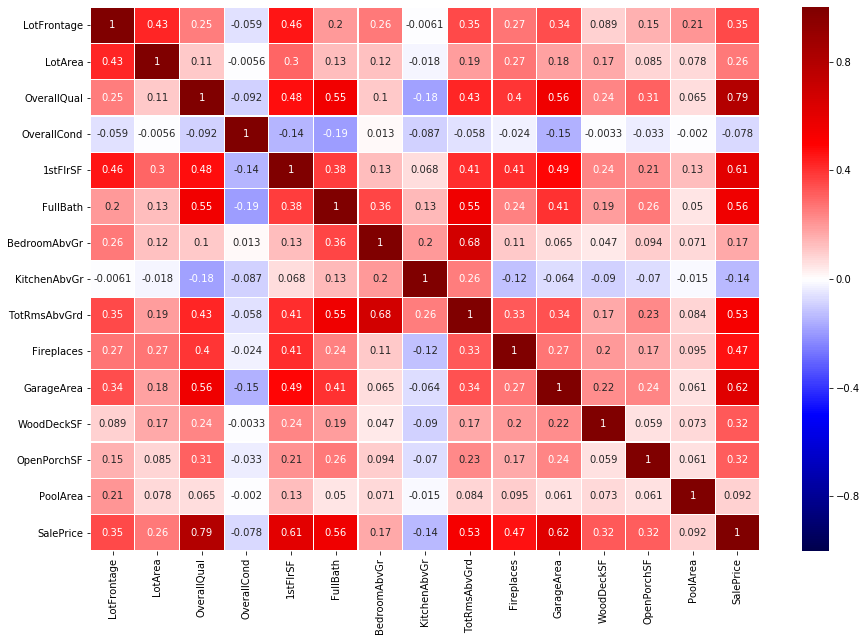

In [3]:
# Select columns for correlation and plot the heatmap
columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'SalePrice']
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df[columns].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True, ax=ax)
ylim = ax.set_ylim(15, 0)

- **Positive Correlation:** The most positive correlation is between OverallQuality and SalePrice meaning that Sale Price increases as Overall Qaulity of the house increases. This correlation also makes sense because the price of the house will depend on the Overall Quality of the house to some extent.
- **Negative Correlation:** The most negative correlation observed is between OverallCondition and number of FullBaths. The correlation shows that the Overall Condition of the house increases as the number of Full Baths in the house decrease. This seems to be a strange correlation and does not necessarily appear to be a causation. It is possible that the higher number of full baths causes cleanliness issues reducing the overall condition of the house.

## Part 2 - Informative Plots

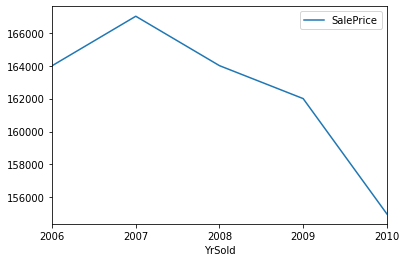

In [4]:
# Plot the median of Sale Price for each year
ax = df[['YrSold', 'SalePrice']].groupby(['YrSold']).median().plot()
xticks = ax.set_xticks(np.delete(ax.get_xticks(), [1, 3, 5, 7]))

#### Plot 1: SalePrice vs Years
The above plot shows the changes in Sale Price of the property every year. It is a plot of the median Sale Price of properties for each year. As observed from the graph, the Sale Price increased from 2006 to 2007 but has been steadily decreasing since 2007. It is the least in 2010 but it might be possible that the dataset has only partial records for the year 2010. The reason for decrease could be that there was a recession between the years 2007 and 2009 resulting in number of sales drops as well as price drops in the real estate business.

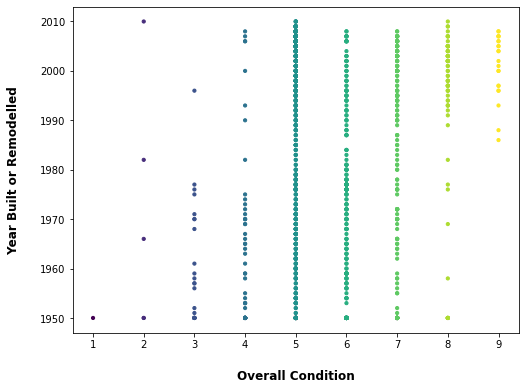

In [5]:
# Plot the Overall Condition of the house with Year it was last remodelled
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['OverallCond'], df['YearRemodAdd'], s=10, c=df['OverallCond'])
ax.set_xlabel('Overall Condition', labelpad=20, weight='bold', size=12)
ylabel = ax.set_ylabel('Year Built or Remodelled', labelpad=20, weight='bold', size=12)

#### Plot 2: YearRemodelled vs OverallCond
The above plot is to show the relationship between the Overall Condition of the house and the year it was last remodelled. We'd expect the newly built and rebuilt houses to have a better condition than old, worn out ones. This can be seen clearly on the plot as houses with a rating of 9 were all built/rebuilt after 1985 and the houses with a rating of 1 are the oldest houses built in 1950. The rating of 5 seems to be the most common rating given to most of the houses that belong to a wide range of years.

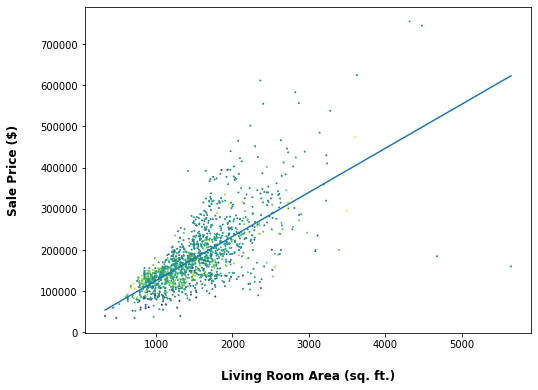

In [6]:
# Plot the Sale Price with Living room area
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], s=1, c=df['OverallCond'])
# Plot a straight line fitting the data points minimizing the squared error
plt.plot(np.unique(df['GrLivArea']), np.poly1d(np.polyfit(df['GrLivArea'], df['SalePrice'], 1))(np.unique(df['GrLivArea'])))
ax.set_xlabel('Living Room Area (sq. ft.)', labelpad=20, weight='bold', size=12)
ylabel = ax.set_ylabel('Sale Price ($)', labelpad=20, weight='bold', size=12)

#### Plot 3: SalePrice vs GrLivArea
The above plot shows the distribution of sale prices according to the area of the living room. We can see a coorelation between them because as the living area increases the sale price of the house also increases. The majority of the points seem to be near the straight line which fits in reasonably well. This shows that living area is an important factor while determining the sale price of the house. The color of the points represent the Overall Condition of the house. I expected similar colors to cluster together and form a linear increasing line in the plot but the colors seem pretty much spread up and nothing much can be inferred from it.

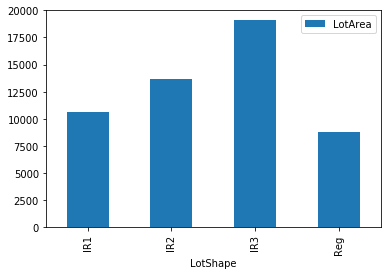

In [7]:
# Plot the median of LotArea for each type of LotShape
ax = df[['LotArea', 'LotShape']].groupby(['LotShape']).median().plot(kind='bar')

#### Plot 4: LotArea vs LotShape
The above plot shows the median of LotArea given a particular shape of Lot. An interesting property observed from this is that, with increase in the irregularity of the shape of the lot, the area of the lot increases. The area of plot should affect the sale price of a property and this helps us to see what shape of lot will have more area and thus higher sale price.

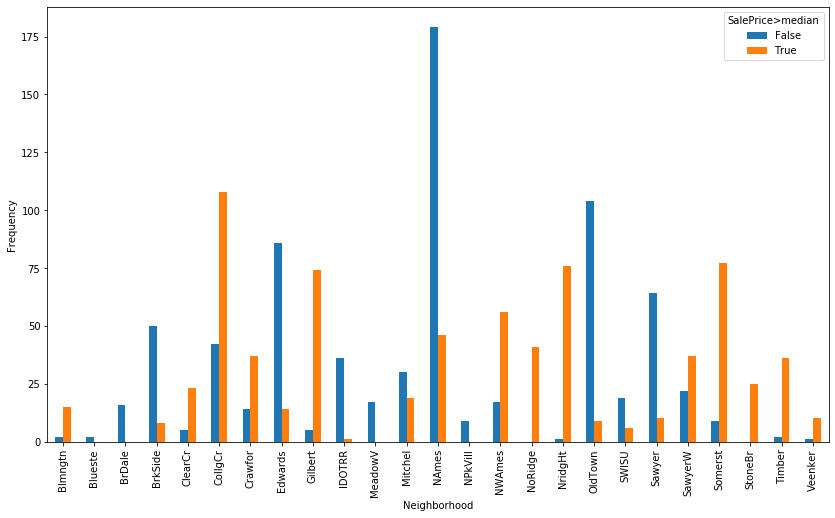

In [8]:
# Plot the frequency of Neighborhood for SalePrice > median
fig, ax = plt.subplots(figsize=(14,8))
pd.crosstab(df.Neighborhood, df['SalePrice'] > df.SalePrice.median()).plot(kind='bar', ax=ax)
plt.legend(title='SalePrice>median')
ylabel = ax.set_ylabel('Frequency')

#### Plot 5: Frequency of Neighborhood
The above plot shows which neighborhoods have higher frequency of selling houses with Sale Price greater than the median Sale Price and less than that. `NAmes` i.e. North Ames seems to have the most number of houses sold at a price less than the median Sale Price while `CollgCr` College Creek appears to be the Neighborhood with most number of houses sold at a price greater than the median Sale Price.

## Part 3 - Handcrafted Scoring Function

In [9]:
# Map categorical names to correspoding ordinal values
landslope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}

# List of columns to be used for scoring function
scoring_columns = ['LandSlope', 'ExterQual', 'ExterCond', 'LotArea', 'OverallQual', 'OverallCond', 
                   'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
                   'GarageArea', 'PoolArea', 'SalePrice']

scaled_df = df.copy()
# Map categorical columns to values
scaled_df['LandSlope'] = scaled_df['LandSlope'].map(landslope_map)
scaled_df['ExterQual'] = scaled_df['ExterQual'].map(qual_map)
scaled_df['ExterCond'] = scaled_df['ExterCond'].map(qual_map)

from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(scaled_df[scoring_columns])
scaled_df = pd.DataFrame(scaled_df, columns=scoring_columns)

# Define weights for scoring columns, positive weights are directly proportional while negative weights are indirectly
# proportional to the score.
weights = {'LandSlope': 1, 'ExterQual': 1.1, 'ExterCond': 1.1, 'LotArea': 1.2, 'OverallQual': 2, 
           'OverallCond': 2, 'YearRemodAdd': 1.5, 'TotalBsmtSF': 0.8, 'GrLivArea': 1.5, 'FullBath': 1, 
           'TotRmsAbvGrd': 1, 'Fireplaces': 0.5, 'GarageArea': 1, 'PoolArea': 0.5, 'SalePrice': -1.5}

# Define the scoring function
def scoring_function(row):
    score = 0
    for col, val in row.items():
        score += val * weights[col]
    return score

# Apply the scores
scaled_df['score'] = scaled_df.apply(scoring_function, axis=1)

#### What is the ten most desirable houses?

In [10]:
# Plot the distribution of the ten most desirable houses
ten_most_desirable_houses = df.iloc[scaled_df.nlargest(10, 'score').index]
ten_most_desirable_houses[scoring_columns].describe()

,LotArea,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,SalePrice
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,22379.900000,9.000000,7.100000,2002.300000,2090.100000,3502.900000,2.700000,10.600000,1.800000,836.300000,48.000000,359105.000000
std,17250.582338,1.247219,2.024846,5.982382,1567.198027,1087.742356,0.483046,1.074968,0.632456,277.986431,151.789328,174362.598643
min,8963.000000,7.000000,5.000000,1993.000000,1107.000000,2324.000000,2.000000,9.000000,1.000000,252.000000,0.000000,160000.000000
25%,12318.000000,8.250000,5.000000,1997.000000,1157.750000,2730.000000,2.250000,10.000000,1.250000,822.750000,0.000000,273625.000000
50%,15952.000000,9.500000,7.500000,2004.000000,1353.500000,3316.500000,3.000000,11.000000,2.000000,836.000000,0.000000,312400.000000
75%,22596.250000,10.000000,9.000000,2007.500000,2314.500000,4139.000000,3.000000,11.000000,2.000000,877.500000,0.000000,442500.000000
max,63887.000000,10.000000,9.000000,2009.000000,6110.000000,5642.000000,3.000000,12.000000,3.000000,1418.000000,480.000000,755000.000000


The ten most desirable houses as per the scoring function mostly belong to the houses remodelled in the **2000's** year with a median Overall Condition of **9.5** and a median Overall Quality of **7.5**. The median Sale Price of the ten houses is **312k** dollars with max Sale Price **755k** dollars and min Sale Price **160k** dollars.

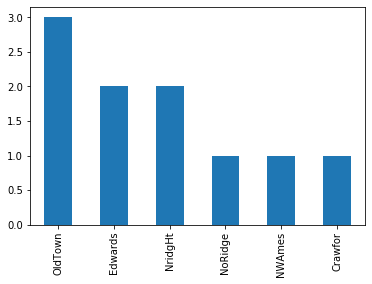

In [11]:
# Plot the histogram of Neighboorhoods in the ten most desirable houses
df.iloc[ten_most_desirable_houses.index]['Neighborhood'].value_counts().plot(kind='bar')

Also if we see the histogram of neighborhoods, `OldTown` appears to be the most desirable neighborhood in the top ten followed by `Edwards` and `Northridge Heights`. The most desirable houses seem to balance the parameters of the scoring function well, not giving too much importance to a particular feature. 

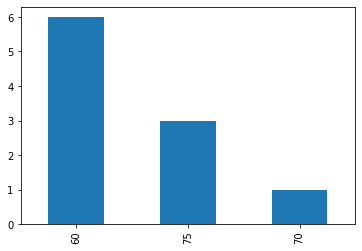

In [12]:
# Plot the histogram of MSSubClass in the ten least desirable houses
df.iloc[ten_most_desirable_houses.index]['MSSubClass'].value_counts().plot(kind='bar')

As number of rooms is one of the factors of house desirability, the distribution of `MSSubClass` seems justifiable where the types 60, 75 and 70 all are 2 story buildings and thus are more desirable.

#### What is the ten least desirable houses?

In [13]:
# Plot the distribution of the ten least desirable houses
ten_least_desirable_houses = df.iloc[scaled_df.nsmallest(10, 'score').index]
ten_least_desirable_houses[scoring_columns].describe()

,LotArea,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,SalePrice
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,7046.800000,2.700000,3.000000,1951.900000,623.300000,802.200000,0.800000,4.200000,0.100000,137.800000,0.0,62511.100000
std,1968.862322,1.159502,0.942809,5.043147,294.527512,263.771281,0.421637,1.032796,0.316228,200.883493,0.0,18039.248842
min,4118.000000,1.000000,1.000000,1950.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.0,35311.000000
25%,5512.500000,2.000000,3.000000,1950.000000,530.750000,719.750000,1.000000,4.000000,0.000000,0.000000,0.0,54000.000000
50%,7166.000000,3.000000,3.000000,1950.000000,707.000000,852.500000,1.000000,4.000000,0.000000,0.000000,0.0,60500.000000
75%,8362.000000,3.750000,3.750000,1950.000000,830.000000,894.000000,1.000000,4.750000,0.000000,270.500000,0.0,74125.000000
max,10020.000000,4.000000,4.000000,1966.000000,936.000000,1306.000000,1.000000,6.000000,1.000000,576.000000,0.0,93000.000000


The ten least desirable houses as per the scoring function primarily belong to the houses built in the **1950's**  with a median Overall Condition and Overall Quality of **3**. The median Sale Price of the ten houses is **60k** dollars with max Sale Price **93k** dollars and min Sale Price **35k** dollars. Even though low Sale Price is desirable, other factors also influence the desirability of a house and so the least desirable houses have low prices as the Condition, Number of rooms, etc. lower the desirability. 

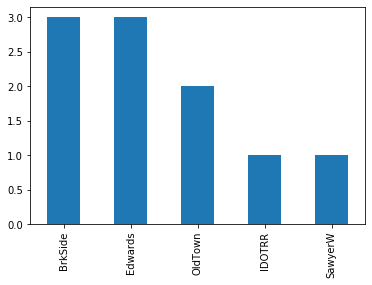

In [14]:
# Plot the histogram of Neighboorhoods in the ten least desirable houses
df.iloc[ten_least_desirable_houses.index]['Neighborhood'].value_counts().plot(kind='bar')

According to the histogram of neighborhoods, `Edwards` and `Brookside` appear to be the least desirable neighborhoods in the bottom ten. 

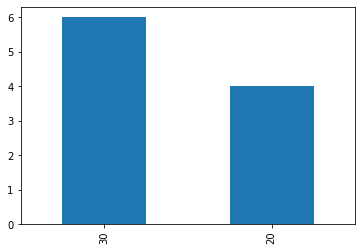

In [15]:
# Plot the histogram of MSSubClass in the ten least desirable houses
df.iloc[ten_least_desirable_houses.index]['MSSubClass'].value_counts().plot(kind='bar')

Also looking at the distribution of `MSSubClass`, the least desirable houses belong to the types 30 and 20, where these are single story old houses and so are less desirable.

#### Describe your scoring function and how well you think it worked.
The scoring function that I have used here is a simple linear function 
$$y = w_1x_1 + w_2x_2 + ... w_nx_n$$
where x1, x2,... are the features of the house and w1, w2,... are the weights associated with each feature. A positive weight has a positive effect of the feature making it desirable while a negative weight has a negative effect meaning the feature is not desirable.  

**Features:** The features used for this scoring are mainly the number of rooms, area of different rooms, condition and quality of the house as well as the Sale Price. The more the area and number of rooms and the better the quality, more is a house desirable while higher Sale Price is not desirable. Also the year remodelled is considered as people prefer to buy new houses than old ones. I have converted certain categorical features to numerical based on the general perception of people. Excellent quality means a higher rating while poor quality means a lower rating is assigned. Also for the landslide, Gentle slope is preferred rather than a steep one. Other categorical features usually had too many values for a particular variable and so I did not experiment with those features.  

**Scaling:** The features have values distributed along various ranges. For example, the Sale Prices are in the order of 100k dollars while the Year is in the range of 1900-2000. Using the raw values will have different impact on the scoring function and so we need to normalize these values between 0 and 1, so that they are comparable. MinMaxScaler scales the values between 0 and 1, retaining the shape of the distribution.

**Weights:** Next, I have assigned weights to each of these features based on a general perception. The Overall Condition and Qaulity have a higher weight than the Sale Price of the house. Rooms and Area of rooms have somewhat equal weights while area of other facilities like Garage and Pool have less weights.

**Performance:** This simple scoring function seems to perform fairly well as it gets a nice distribution of houses among these features. No particular feature has an extreme domination over other features. The scoring function factors in the most important features of a house but ignores subtle features which may be subjective. This is not an absolute scoring function which will work for everyone, but it provides a nice picture of basic features influencing the desirability of a house. Also the function is customizable, meaning new features can be easily added to this function as well as the weights can be tweaked for each feature.

## Part 4 - Pairwise Distance Function

#### How well does the distance function work? When does it do well/badly?
Two houses can be considered similar and have a less distance between them if they have similar features. We can normalize each of the features of the houses and then let the values create a representation of the house. This will look like a vector for each house and then we can use the cosine distance and cosine similarity functions to calculate the distance and similarity between two houses.

**Note:** The similarity function has an inverse relation to the distance function which means that the lower the distance, the higher the similarity between houses. I have mainly used similarity measure in the following code.

In [16]:
# List of columns to be used for distance function
distance_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                    'KitchenAbvGr', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                    'Fireplaces', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
# List of categorical columns to be used for distance function
categorical_cols = ['Street', 'LotShape', 'LandSlope', 'BldgType']

distance_df = df[distance_columns].copy()
categorical_df = df[categorical_cols].copy()

from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(distance_df)
scaled_df = pd.DataFrame(scaled_values, columns=distance_columns)

# Concatenate scaled values dataframe with categorical values dataframe
distance_df = pd.concat([scaled_df, categorical_df], axis=1)

# One hot encoding for categorical columns
for categorical_col in distance_df.select_dtypes(include=['object']).columns:
    distance_df[categorical_col] = pd.Categorical(distance_df[categorical_col])
distance_df = pd.get_dummies(distance_df)

The `distance_df` dataframe created now has unique vectors for each house (row) based on the features that can define the similarity of houses like the number of rooms, area of each room, area of each floor, etc. It also uses some categorical features like Street, LotShape, and BldgType that may define how similar are two houses. We can now calculate the cosine_similarity between houses using these vectors. The cosine similarity will be high if the two houses have similar values in each of these features and thus will be similar in nature and the cosine similarity will be low if the features have different values.

In [17]:
# Create a numpy matrix of the house vectors
distance_mat = distance_df.values

# Calculate cosine similarities of each house with every other house
norm = (distance_mat.T * distance_mat.T).sum(0, keepdims=True) ** .5
similarities = distance_mat @ distance_mat.T
similarities = similarities / norm / norm.T

sorted_similarities = np.argsort(similarities, axis=0)

In [18]:
most_similar_houses = sorted_similarities[-2]
df.iloc[[0, most_similar_houses[0]]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1240,1241,60,RL,65.0,8158,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900


If we see the house that is most similar to house at index 0 we find that both these houses have extremely similar features in terms of the columns that we used for the calculation of the distance. Also other variables such as `MSSubClass`, `MSZoning`, `SalePrice`, etc. which were not even part of the distance function also have similar values for both these houses. This shows that the distance function performs really well and finds good similar houses using a small set of variables.

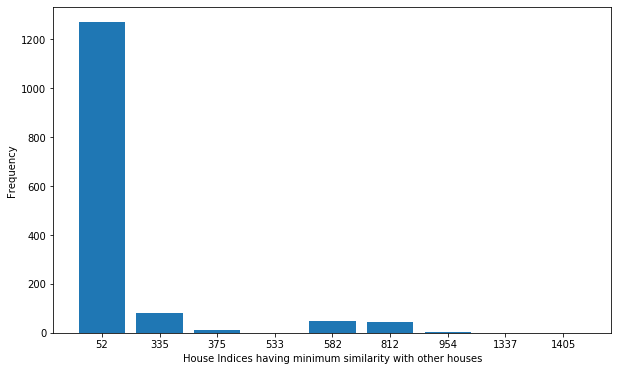

In [19]:
# Plot the frequency of house index which has minimum similarities with other houses
min_similar_houses = sorted_similarities[0]

unique_elements, counts = np.unique(min_similar_houses, return_counts=True)
unique_elements = [str(i) for i in unique_elements]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=unique_elements, height=counts)
ax.set_xlabel('House Indices having minimum similarity with other houses')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(unique_elements)

The above plot shows that the house at index 52 has the least similarity with most other houses. This house has the most dissimilar vector in the vector space and appears to be as a noise in the dataset. There are also a few other houses which are least similar to other houses in the dataset suggesting either the distance function does not work well for these houses or these are simply noisy data points in the dataset.

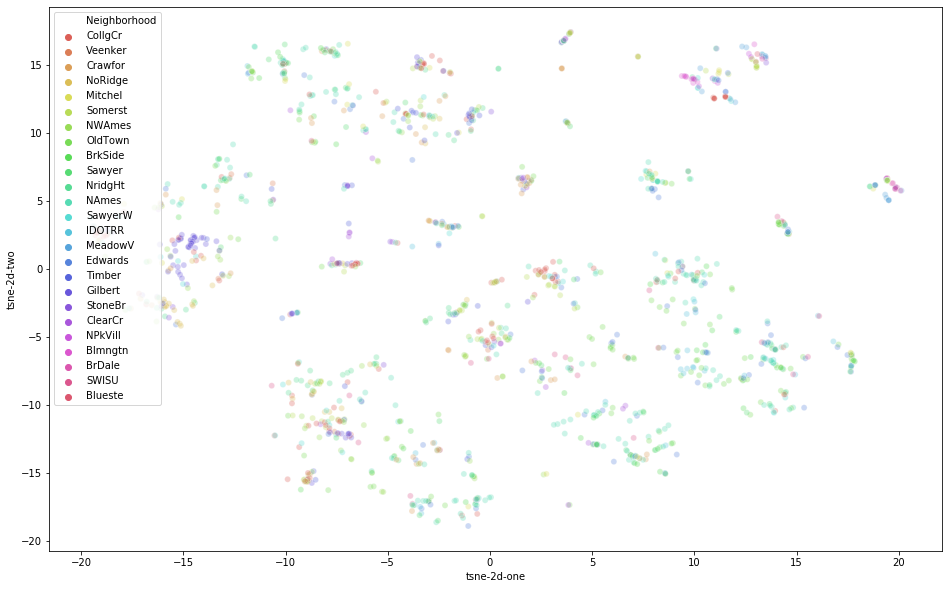

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Plot the house vectors in 2d dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

tsne_df = df.copy()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Neighborhood",
    palette=sns.color_palette("hls", n_colors=len(tsne_df.Neighborhood.value_counts())), # Color using Neighborhood
    data=tsne_df,
    legend="full", 
    alpha=0.3
)

The above plot is a 2-dimensional plot of the _33_ dimensional distance vector created for the distance function. The colors of the scatter plot represent different neighborhoods that the houses belong to. We expect houses in the same neighborhood to have similar features and thus have higher similarity. That does not seem to be the case here. Even though the houses do form clusters but the clusters have a mixed Neighborhood in them. 

**Conclusion:** The distance function seems to perform well in most of the cases and only produces a few outliers. It doesn't cluster houses by Neighborhood, meaning the houses in the same Neighborhood do not seem to have features like area, number of rooms, etc. used in the distance function, similar to each other. The function also does not consider the quality of rooms as a distance metric resulting in a few dissimilarities between similar houses.

## Part 5 - Clustering
For clustering, we can try agglomerative clustering which starts from a random point and clusters in nearest neighbors until a threshold distance is reached or cluster size is full. Using the `similarities` matrix from the previous question we can create the cluster.

In [21]:
distances = 1 - similarities

In [22]:
# Create cluster labels using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
house_clusters = cluster.fit(distances)

# Concatenate cluster labels to the dataset
cluster_df = pd.concat([df.copy(), pd.DataFrame(house_clusters.labels_, columns=['cluster_label'])], axis=1)

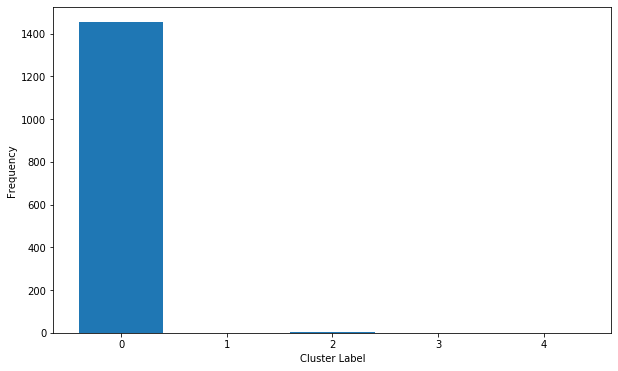

In [23]:
# Plot the histogram of each cluster label
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=cluster_df.cluster_label.value_counts().index, height=cluster_df.cluster_label.value_counts())
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(cluster_df.cluster_label.value_counts().index)

We can see that with only 5 classes, the clusters formed are not so good as most of the houses belong to the same cluster (0). This is expected because as seen in the t-SNE plot we can easily identify multiple clusters being formed in the 2 dimensions so using only 5 classes, most of the classes will have outliers in their own clusters.

In [24]:
# Create cluster labels using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, affinity='precomputed', linkage='average')
house_clusters = cluster.fit(distances)

# Concatenate cluster labels to the dataset
cluster_df = pd.concat([df.copy(), pd.DataFrame(house_clusters.labels_, columns=['cluster_label'])], axis=1)

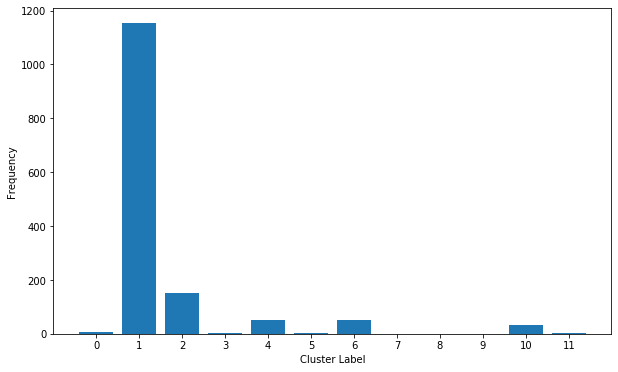

In [25]:
# Plot the histogram of each cluster label
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=cluster_df.cluster_label.value_counts().index, height=cluster_df.cluster_label.value_counts())
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(cluster_df.cluster_label.value_counts().index)

Using 12 clusters, we can see better group of clusters now with cluster ids 2, 4, 6 and 10 having some amount of houses in them. There are still outliers forming their own groups in clusters like 7, 8, 9. Increasing the number of clusters to 20 might give us a better clustering.

In [26]:
# Create cluster labels using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='precomputed', linkage='average')
house_clusters = cluster.fit(distances)

# Concatenate cluster labels to the dataset
cluster_df = pd.concat([df.copy(), pd.DataFrame(house_clusters.labels_, columns=['cluster_label'])], axis=1)

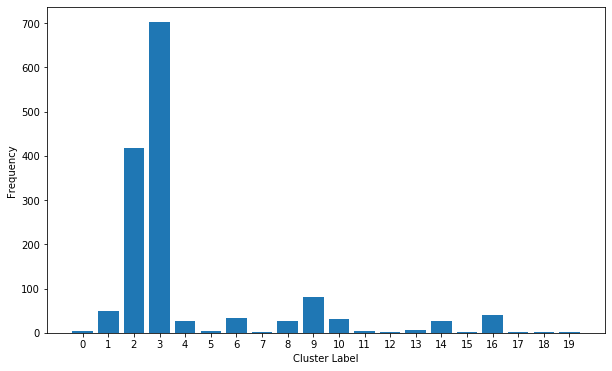

In [27]:
# Plot the histogram of each cluster label
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=cluster_df.cluster_label.value_counts().index, height=cluster_df.cluster_label.value_counts())
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(cluster_df.cluster_label.value_counts().index)

Using 20 clusters, we can now see better groups of clusters with ids 2 and 3 having most of the houses while remaining houses are spread in ids 1, 8, 9, 10, and 16. The only issue with clustering I have faced so far is dealing with outliers. The outliers seem to be far away from any of the houses and they end up forming their own clusters always. A t-SNE plot will give us a better picture of the clusters and its outliers.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.002s...
[t-SNE] Computed neighbors for 1460 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.234840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.066685
[t-SNE] KL divergence after 300 iterations: 0.600527


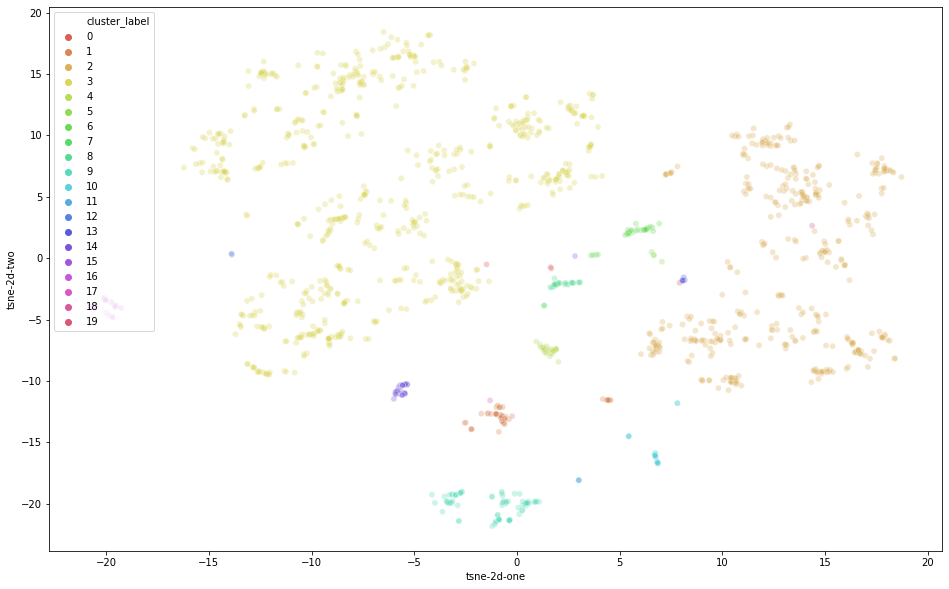

In [28]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

cluster_df['tsne-2d-one'] = tsne_results[:,0]
cluster_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",
    palette=sns.color_palette("hls", n_colors=len(cluster_df.cluster_label.value_counts())),
    data=cluster_df,
    legend="full", 
    alpha=0.3
)

The t-SNE plot shows a nice grouping of clusters where all the nearby neighbours are in the same cluster. We can also clearly spot the outliers forming their own small clusters in the plot. Increasing the number of classes to 30 would give us a better and tighter cluster of points.

#### How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.


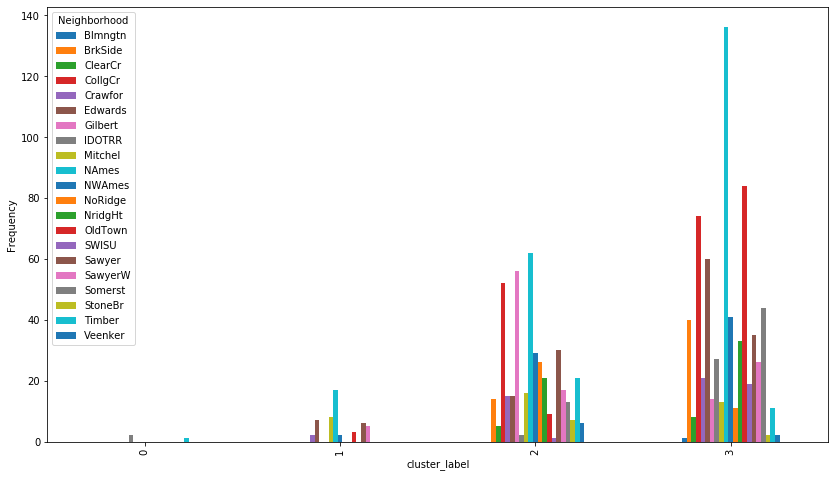

In [29]:
# Plot the frequency of Neighborhood in few clusters
fig, ax = plt.subplots(figsize=(14,8))
filtered_cluster_df = cluster_df[cluster_df['cluster_label'] < 4]
pd.crosstab(filtered_cluster_df.cluster_label, filtered_cluster_df.Neighborhood).plot(kind='bar', ax=ax)
ylabel = ax.set_ylabel('Frequency')

Each cluster here has clearly more than one neighborhood in it which means that the cluster algorithm does not produce good neighborhood boundaries using the distance function used here. This is probably because of the fact that the distance function considers two houses to be similar if they have similar number of rooms, area of rooms, etc. However this may not be true in the case of Neighborhoods where houses in the same neighborhood have the same number of rooms. It could be that each neighborhood has a variety of houses with some having a basement, some having 2 storeys, and some having different number of rooms. The distance function and the clustering algorithm fails to consider this and so do not produce good neighborhood boundaries. But the clustering algorithm successfully forms cluster of houses based on the features given to it, with a few exceptions of outliers being produced.

## Part 6 - Linear Regression

In [33]:
trainset = df.copy()

In [34]:
# PRE-PROCESSING

# Replace NaNs with NA for categorical columns
na_cols = ['Alley', 'MasVnrType', 'GarageType', 'GarageFinish']
for col in na_cols:
    trainset[col] = trainset[col].fillna('NA')

# Replace NaNs with 0 for categorical columns that can be converted to ordinals
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}
qual_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'HeatingQC', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond', 'KitchenQual', 'PoolQC']
for col in qual_cols:
    trainset[col] = trainset[col].map(qual_map).fillna(0)

In [35]:
# Numerical Columns to be used for training
numerical_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual', 
                 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 
                 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 
                 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                 'ScreenPorch']

trainset = trainset[numerical_cols]

In [36]:
# Categorical columns to be used for training
categorical_cols = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'Foundation', 
                    'CentralAir', 'GarageType', 'GarageFinish']
# Perform one hot encoding and join it with existing training set
ohe = pd.get_dummies(df[categorical_cols])
trainset = trainset.join(ohe)
training_cols = trainset.columns.to_list()

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = trainset
y = df['SalePrice']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Learn a linear regression model on the train set
regressor = LinearRegression().fit(X_train, y_train)

#### How well/badly does it work? Which are the most important variables?

In [38]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

Root Mean Squared Error: 0.1772033705930145


As per the Root Mean Squared Error of the test data, the simple linear regression model seems to perform okay with the given features. An error of **0.1772** does seem to be high but trying to reduce it further might overfit the model. The prominent features used in the model are `GrLivArea` and `Neighborhood` which had high correlations with `SalePrice`. Other features usually had the same value for all the rows and did not seem promising to be used in the model for price prediction.

In [39]:
co_effs = pd.DataFrame({'Column': X.columns, 'Coefficient': regressor.coef_})

In [44]:
co_effs[(co_effs.Coefficient == co_effs.Coefficient.max()) | (co_effs.Coefficient == co_effs.Coefficient.min())]

,Column,Coeeficient
56,Neighborhood_StoneBr,48101.355710
80,GarageType_2Types,-34680.967066


According to the linear regression model, categorical ohe column `Neighborhood_StoneBr` has the highest coefficient value and the categorical ohe column `GarageType_2Types` has the lowest coefficient value. These coefficients are the weights assigned to these features which means these are the most important columns in deciding the Sale Price. With a high positive coefficient value, `Neighborhood_StoneBr` has a high directly proportional impact on the Sale Price, while `GarageType_2Types` with a low negative value, has a high inversely proportional impact on the Sale Price. The linear regression model has learned these coefficients based on the training set.

## Part 7 - External Dataset

In [31]:
# TODO: code to import external dataset and test

Describe the dataset and whether this data helps with prediction.

## Part 8 - Permutation Test

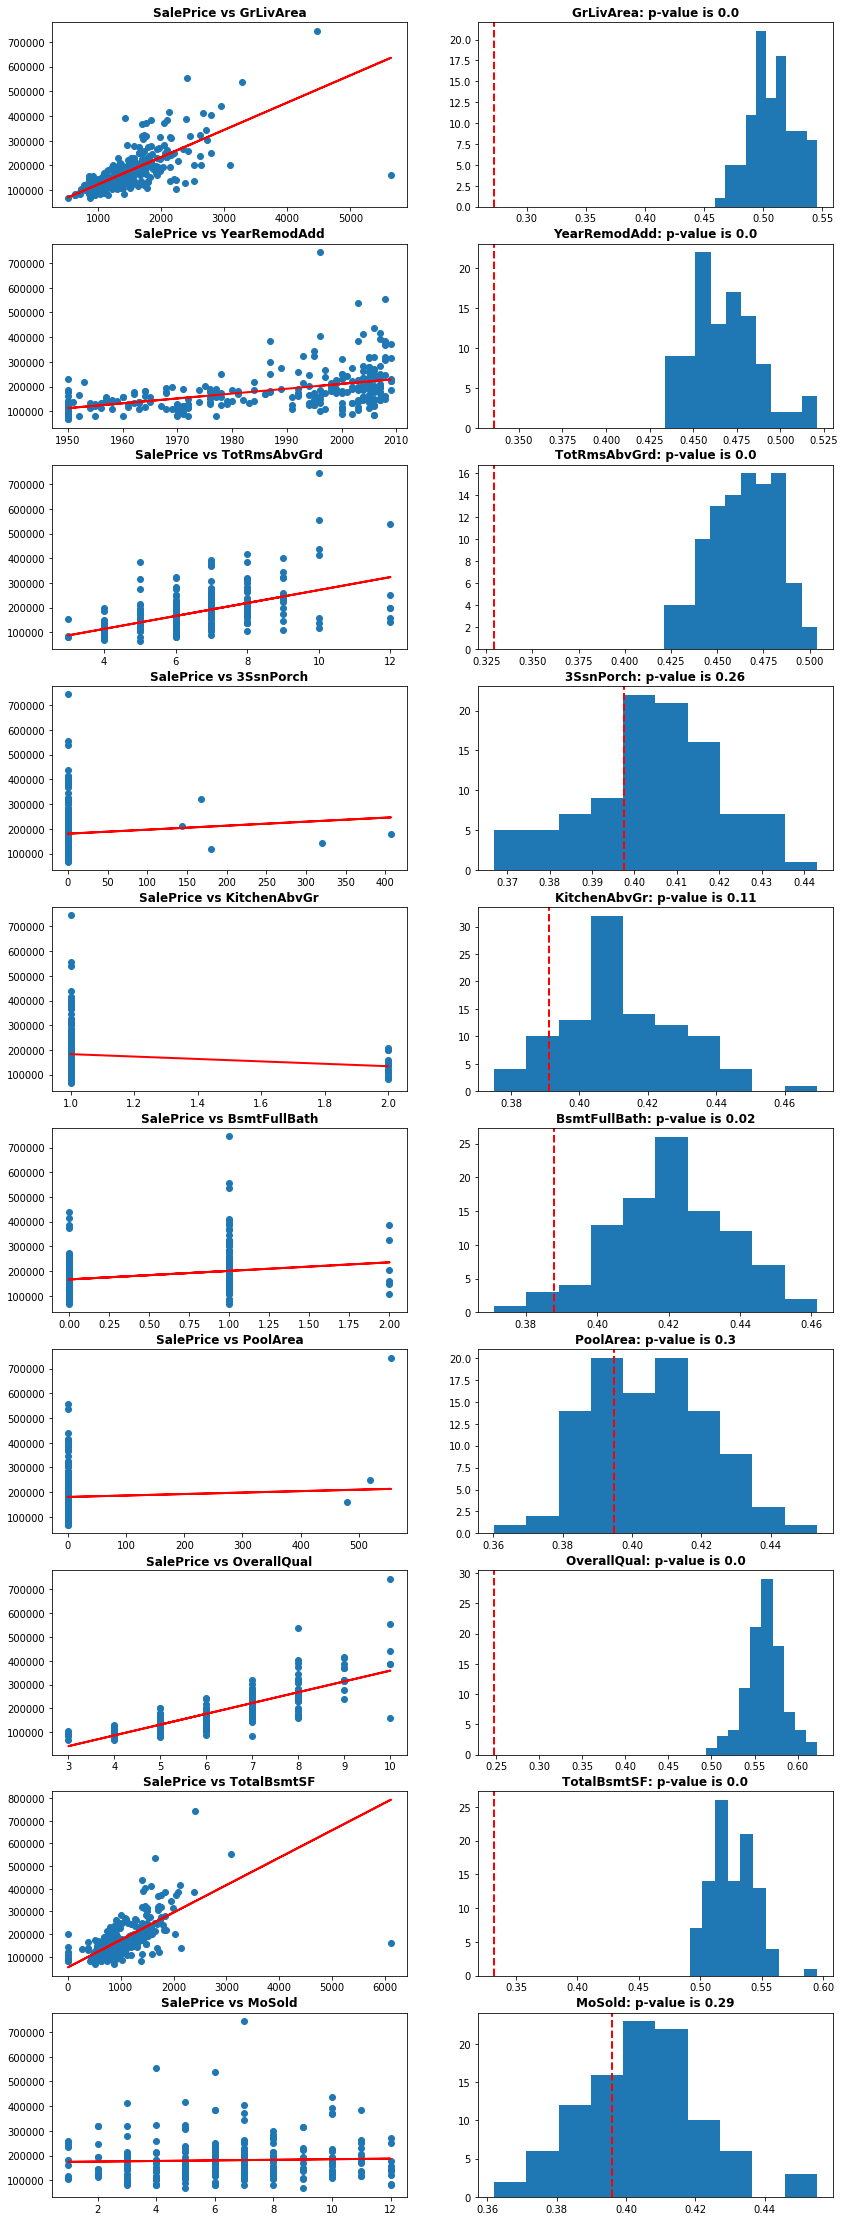

In [47]:
trainset = df.copy()

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Columns to use for permutation tests
permutation_test_cols = ['GrLivArea', 'YearRemodAdd', 'TotRmsAbvGrd', '3SsnPorch', 'KitchenAbvGr', 
                         'BsmtFullBath', 'PoolArea', 'OverallQual', 'TotalBsmtSF', 'MoSold']
# Subplots for different permutation tests
n_rows = len(permutation_test_cols)
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))

# For each column do a permutation test
for test_number, col in enumerate(permutation_test_cols):
    # Set training data as the feature column
    X = trainset[col].values.reshape(-1,1)
    y = trainset['SalePrice'].values.reshape(-1,1)
    
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train a simple linear regression model
    regressor = LinearRegression().fit(X_train, y_train)

    # Predict the Sale Price for the test
    y_pred = regressor.predict(X_test)

    # Calculate rmse for the predicted value
    rmse_y = np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred)))

    # Perform 100 permutations of SalePrice and calculate rmse with respect to random permutations
    n_permutations = 100
    y_random, rmse_random = [], np.zeros((100))
    for i in range(n_permutations):
        y_random.append(trainset.sample(y_test.shape[0])['SalePrice'].values.reshape(-1, 1))
        rmse_random[i] = np.sqrt(metrics.mean_squared_error(np.log(y_random[i]), np.log(y_pred)))

    # Calculate p-value as number of random samples rmse less than equal to real data rmse normalized 
    # by the number of permutations
    p_value = len(np.where(rmse_random <= rmse_y)[0]) / n_permutations
    
    ax1 = axes[test_number][0]
    ax2 = axes[test_number][1]
    
    # Plot the predicted line with actual data
    ax1.scatter(X_test, y_test)
    ax1.plot(X_test, y_pred, color='red', linewidth=2)
    ax1.set_title("SalePrice vs {0}".format(col), fontweight='bold', fontsize=12)
    
    # Plot the histogram of rmse from random permutations
    ax2.hist(rmse_random)
    ax2.axvline(rmse_y, color='red', linestyle='dashed', linewidth=2)
    ax2.set_title("{0}: p-value is {1}".format(col, p_value), fontweight='bold', fontsize=12)

#### Describe the results.
1. **GrLivArea:** The variable living room area, performs really well as a single variable in predicting the Sale Price of the house. We can see that the linear regression fits a line nicely among the values and the GrLivArea has a linear corelation with Sale Price. It has a low RMSE of **~0.25**. The p-value of the permutation test is **0** which means that this variable has a 0% probability of getting this RMSE by chance. This confirms the hypothesis of the variable actually being corelated with target.
1. **YearRemodAdd:** The Year Remodelled variable has a low RMSE of **~0.3** and somewhat fits a line covering a lot of points. Considering the permutation test, it has a p-value of **0** confirming the hypothesis of it predicting the Sale Price not by chance.
1. **TotRmsAbvGrd:** We expect the Sale Price to be a function of number of rooms with increasing price for every increase in number of rooms. This hypothesis can be confirmed looking at the permutation test having a p-value of **0** and a low RMSE of **~0.325**
1. **3SsnPorch:** The variable Three season porch area does not seem to predict the Sale Price accurately. It has a high RMSE of **~0.4** and a p-value of **0.26**. It can be seen from the plot that even random permutations give a better RMSE value and thus this variable has little significance in predicting Sale Price.
1. **KitchenAbvGrd:** We'd expect the Sale Price to increase with the number of kitchens in the house. But while predicting Sale Price using only this feature, it is seen that it has a high RMSE of **~0.4**. This variable has only two values 1 and 2 and most of the houses seem to have 1 kitchen with a spread of Sale Price among them. It has a p-value of **0.11** which isn't good and thus shows that this variable does not seem to be influencing the Sale Price.
1. **BsmtFullBath:** This variable represents the number of full baths that the house has in its basement. Similar to the number of kitchens, this variable has only few values and the model is not able to fit a linear line along all the points. It has a high RMSE of **~0.39** and a p-value of **0.2**.
1. **PoolArea:** The Pool area variable has a lot of zero values and a few outliers with values around 500. As it does not provide much information about different houses, it is expected to perform worse and has a high RMSE of **~0.4** and a high p-value of **0.3**.
1. **OverallQual:** The plot for Overall quality clearly shows a trend of increasing Sale Price with increase in quality. The model a able to fit a line across these values giving an RMSE of **~0.25**. It has p-value of **0** for 100 random permutations and confirms the hypothesis of being related to Sale Price.
1. **TotalBsmtSF:** The Sale Price of a house should be a direct function of the area of a house and so the area of Basement should affect the Sale Price given that a house has a basement. This variable does help in predicting Sale Price for houses that have a basement. It has an RMSE of **~0.35** which is quite high, but a p-value of **0** suggesting we cannot discard the hypothesis.
1. **MoSold:** The Sale Prices of the house are evenly distributed among the values of this variable. This is expected as the price of the house should not depend on the month in which it was sold. The linear regression model performs poorly using this variable with an RMSE of **~0.4** and a p-value of **0.29** in the permutation test.

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/rmodi6

Highest Rank: FILL HERE

Score: FILL HERE

Number of entries: FILL HERE

INCLUDE IMAGE OF YOUR KAGGLE RANKING

## References
1. Scatter plots: https://chrisalbon.com/python/data_visualization/matplotlib_scatterplot_from_pandas/
1. Fit straight line: https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
1. Feature Scaling: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
1. Manual Similarity: https://developers.google.com/machine-learning/clustering/similarity/manual-similarity
1. Similarity Distance Measures: https://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
1. t-SNE: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
1. Agglomerative Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
1. Linear Regression: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f